data orginal  - equilibrio entre classes de fadiga

### Import of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading of the file and one of the sheets

### Description of the variables

- deltaWt - fazer percentual

In [2]:
# The athletes' names are hiden, and only the initial name and gender are visible through the naming of each dataset

Athletes = {'F_f': '',
            'J_f': '',
            'F_m': '',
            'G_m': '',
            'V_f': '',
            'A_m': '',
            'I_f': ''
            }

# Importing the data to the Athletes dictionary
for i in Athletes:
    Athletes[i] = pd.read_excel('/Users/joaop.cardoso/MestradoCD/FAA/Project One/DataFatigInd.xlsx', sheet_name = i)
    Athletes[i]['U.A. Intensidade (ontem)'] =  Athletes[i]['U.A. Intensidade'].shift(1)
    Athletes[i]['Athlete'] = i
    Athletes[i]['Diferença Peso'] = Athletes[i]['Peso basal'].pct_change()
    Athletes[i]['Diferença Pulso'] = Athletes[i]['Pulso após 2 horas'] - Athletes[i]['Pulso basal']
    Athletes[i].rename(columns={'Data': 'Date',
                                'Nr dia': 'NrDay',
                                'Qualidade de Sono': 'QSleep',
                                'Horas de Cama': 'TSleep',
                                'Apetite': 'Appetite',
                                'Estado de Ânimo': 'StSpirit',
                                'Percepção Carga': 'pEffort',
                                'Pulso após 2 horas': 'ATHr',
                                'Pulso basal': 'Hr',
                                'U.A. Intensidade': 'uaI',
                                'ÍNDICE DE FADIGA': 'FatigInd',
                                'Peso basal': 'Wt',
                                'U.A. Intensidade (ontem)': 'uaI(-1)',
                                'Diferença Peso': 'DeltaWt (%)',
                                'Diferença Pulso': 'DeltaHrtwo'
                                }, inplace=True)
    Athletes[i]["Name"] = i
    Athletes[i]["Sex_F"] = 1 if i[-1] == "f" else 0
    Athletes[i]["SleepInd"] =  Athletes[i]["QSleep"] - Athletes[i]["TSleep"]
    
df = pd.concat(Athletes.values(), ignore_index=True)
df.drop(columns=['NrDay', 'QSleep', 'TSleep', 'Hr', 'ATHr', 'Wt'], inplace=True)

df.head(5)

/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_54796/1516620280.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  Athletes[i]['Diferença Peso'] = Athletes[i]['Peso basal'].pct_change()


,Date,Appetite,StSpirit,pEffort,uaI,FatigInd,uaI(-1),Athlete,DeltaWt (%),DeltaHrtwo,Name,Sex_F,SleepInd
0,2019-10-18,6.0,4.0,6.0,1.76,99.809325,NaN,F_f,NaN,2.0,F_f,1,-3.50
1,2019-10-19,7.0,7.0,7.0,1.66,87.095325,1.76,F_f,0.000000,-6.0,F_f,1,-7.00
2,2019-10-20,7.0,3.0,4.0,1.42,50.660225,1.66,F_f,0.000000,6.0,F_f,1,-8.75
3,2019-10-21,5.0,3.0,4.0,2.03,64.996625,1.42,F_f,0.000000,0.0,F_f,1,-5.50
4,2019-10-22,6.0,3.0,6.0,1.62,57.985725,2.03,F_f,0.009917,-6.0,F_f,1,-5.00


O mais interessante é saber a classificação da fadiga para determinar o peso do treino e não o valor, logo devemos fazer intervalos. Seguindo as indicaçãos do expert aka treinador:

5 fatigue classifications:

- *Risk*: Danger! Must rest. Risk of injury or pathological fatigue.

- *Caution*: Caution! If it repeats over several days, reduce the load.

- *Optimal*: Optimal workload.

- *Low*: Low load zone. For recovery purposes only.

- *Minimal*: Excessively low load. Ineffective work.

In [3]:
def fatigue_class(fatigue):
    if fatigue > 90:
        return "Risk"
    elif fatigue > 80:
        return "Caution"
    elif fatigue >= 40:
        return "Optimal"
    else:
        return "Low/Minimal"
    
df["FatigInd"] = df["FatigInd"].map(fatigue_class)

In [4]:
# Brief description of the data
df = df[['Name', 'Date', 'Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
         'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'FatigInd']]

df.info()#.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         1272 non-null   object        
 1   Date         1272 non-null   datetime64[ns]
 2   Sex_F        1272 non-null   int64         
 3   Appetite     1183 non-null   float64       
 4   SleepInd     1185 non-null   float64       
 5   StSpirit     1183 non-null   float64       
 6   pEffort      1183 non-null   float64       
 7   uaI          1255 non-null   float64       
 8   uaI(-1)      1248 non-null   float64       
 9   DeltaWt (%)  1265 non-null   float64       
 10  DeltaHrtwo   1171 non-null   float64       
 11  FatigInd     1272 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 119.4+ KB


In [5]:
df.isna().sum()

Name             0
Date             0
Sex_F            0
Appetite        89
SleepInd        87
StSpirit        89
pEffort         89
uaI             17
uaI(-1)         24
DeltaWt (%)      7
DeltaHrtwo     101
FatigInd         0
dtype: int64

### Description of the variables


- *deltahrtwo - se modelo for mau, fazer apos2h - media do basal - 10

- *DeltaHrb

| Variables             | Simplified variable | Description                                                   | Scale     |
| --------------------- | ------------------- | ------------------------------------------------------------- | --------- |
|                       | All scales go from lowest (best feeling) to highest (worse feeling)                 |           |
| Data                  | Date                | Date of the measure                                           | Ordinal   |
| Índice de Sono        | SleepInd            | Calculated as function of quality of sleep and time in bed    | Ordinal   |
| Apetite               | Appetite            | Measure of appetite throughout the day                        | 2 - 10    |
| Estado de ânimo       | StSpirit            | State of spirit, motivation                                   | 2 - 10    |
| Percepção de carga    | pEffort             | Perceived effort from the workout                             | 2 - 10    |
| Diferença pulso 2 hr  | DeltaHrtwo          | Delta of heart rate before and after the workout              | 2 - 10    |
| U. A. Intensidade     | uaI                 | Calculated int. from each workout, depending on type of exe.  | 1 - 5     |
| Índica de Fadiga      | FatigInd            | Calculated fatigue index from the variables above             | 0 - 100   |
| Diferença peso        | DeltaWt             | Percentual difference in weight in consecutive days           | 0 - 100   |
| U. A. Intensidade (ontem) | uaI(-1)         | uaI from the day before                                       | 1 - 5     |
|                       | Name                | First letter of the athlete's name and sex                    |           |
|                       | Sex_F               | Athlete's gender                                              |           |

## NaN

apos analisar as variaveis e os valores em falta, chegou-se a conclusao que o melhor seria remover obs com valores em falta

In [6]:
rows_before = len(df)

df.dropna(inplace=True)

rows_after = len(df)

print(f"Number of rows lost: {rows_before - rows_after}")


Number of rows lost: 111


In [7]:
df.isna().sum()

Name           0
Date           0
Sex_F          0
Appetite       0
SleepInd       0
StSpirit       0
pEffort        0
uaI            0
uaI(-1)        0
DeltaWt (%)    0
DeltaHrtwo     0
FatigInd       0
dtype: int64

## dataset analysis pt.2 

ver qnt de tipos de fadiga

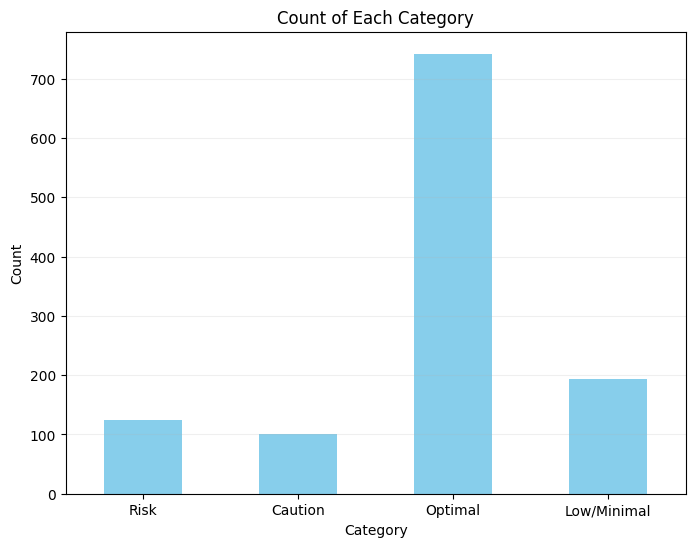

In [8]:
contagem = df["FatigInd"].value_counts()
contagem = contagem.reindex(["Risk", "Caution", "Optimal", "Low/Minimal"])
contagem.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.2)
plt.xticks(rotation=0)
plt.show()

como temos demasiados ótimos, isto pode enviesar os resultados, ent é melhor apagarmos alguns do optimal e talvez do low. até ficar ao mesmo nivel do Risk. a diferenca entre risk e caution será insiginificante, e o minimal por ser um valor muito extremo pode ficar assim, ig

sao selecionadas ate ao limite, as primeiras de cada classe, pq as primeiras obs sao referentes aos atletas com maior qualidade de dados, digo eu, ou com mais importancia, se n pode se mudar "head" para "sample"

/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_54796/1263615186.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_limited = df.groupby('FatigInd', group_keys=False).apply(lambda group: group.head(min(len(group), limite)))#.reset_index(drop=True)


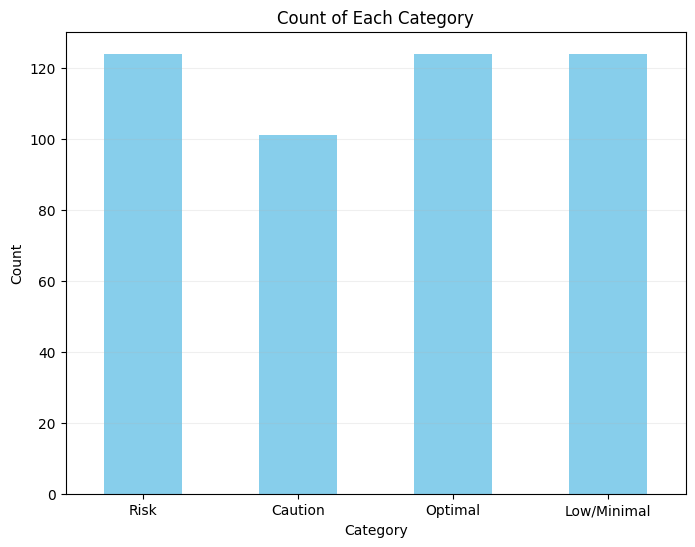

In [9]:
limite = contagem["Risk"]
df_limited = df.groupby('FatigInd', group_keys=False).apply(lambda group: group.head(min(len(group), limite)))#.reset_index(drop=True)

contagem = df_limited["FatigInd"].value_counts()
contagem = contagem.reindex(["Risk", "Caution", "Optimal", "Low/Minimal"])
contagem.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.2)
plt.xticks(rotation=0)
plt.show()

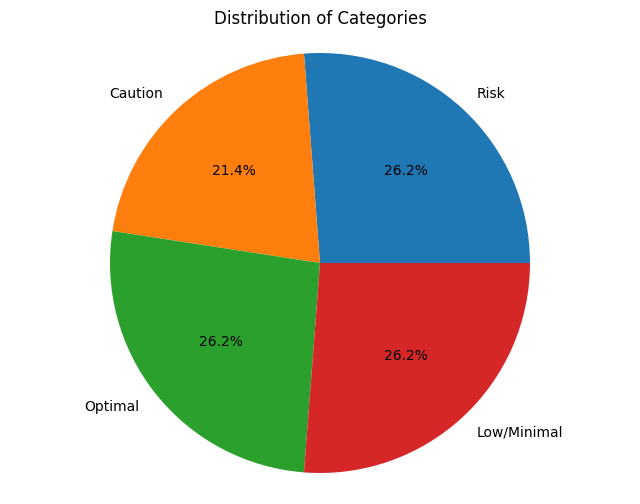

In [10]:
contagem = df_limited["FatigInd"].value_counts()
contagem = contagem.reindex(["Risk", "Caution", "Optimal", "Low/Minimal"])

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [11]:
print(f"Rows after: {len(df_limited)}")
df_limited.head(3)

Rows after: 473


,Name,Date,Sex_F,Appetite,SleepInd,StSpirit,pEffort,uaI,uaI(-1),DeltaWt (%),DeltaHrtwo,FatigInd
1,F_f,2019-10-19,1,7.0,-7.0,7.0,7.0,1.66,1.76,0.000000,-6.0,Caution
13,F_f,2019-10-31,1,6.0,-4.5,3.0,5.0,2.02,2.19,0.001647,-6.0,Caution
27,F_f,2019-11-14,1,6.0,-4.0,4.0,5.0,2.12,2.32,0.004959,-6.0,Caution


# normalizacao

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_cols = df_limited.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df_limited.select_dtypes(exclude=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize only the numeric columns
df_limited[numeric_cols] = scaler.fit_transform(df_limited[numeric_cols])

# Display the resulting DataFrame
print("DataFrame with standardized numeric columns only:")
df_limited #sex_f nao devia ser standartizado


DataFrame with standardized numeric columns only:


,Name,Date,Sex_F,Appetite,SleepInd,StSpirit,pEffort,uaI,uaI(-1),DeltaWt (%),DeltaHrtwo,FatigInd
1,F_f,2019-10-19,0.599329,1.553068,-1.482908,2.457208,0.988544,-0.369799,-0.156736,-0.040691,-0.963185,Caution
13,F_f,2019-10-31,0.599329,0.564372,0.322351,-1.223740,-0.031263,0.113317,0.398155,0.183207,-0.963185,Caution
27,F_f,2019-11-14,0.599329,0.564372,0.683403,-0.303503,-0.031263,0.247517,0.565913,0.633222,-0.963185,Caution
28,F_f,2019-11-15,0.599329,0.564372,-0.038700,0.616734,-0.031263,0.489075,0.307824,-0.711278,-0.963185,Caution
29,F_f,2019-11-16,0.599329,0.564372,1.044455,-1.223740,-0.031263,0.529335,0.540104,-0.265328,-0.963185,Caution
...,...,...,...,...,...,...,...,...,...,...,...,...
1240,I_f,2020-04-15,0.599329,0.564372,-0.760804,0.616734,0.478641,0.086478,0.152971,-0.040691,0.557408,Risk
1253,I_f,2020-04-28,0.599329,0.564372,0.683403,0.616734,0.988544,0.086478,0.152971,-0.040691,1.064272,Risk
1259,I_f,2020-05-04,0.599329,0.564372,-1.482908,0.616734,-0.031263,0.086478,-2.427916,-0.040691,1.064272,Risk
1262,I_f,2020-05-07,0.599329,0.564372,-0.760804,0.616734,0.478641,0.086478,0.152971,-0.040691,-0.456321,Risk


## Análise bivariada (relações entre variáveis)

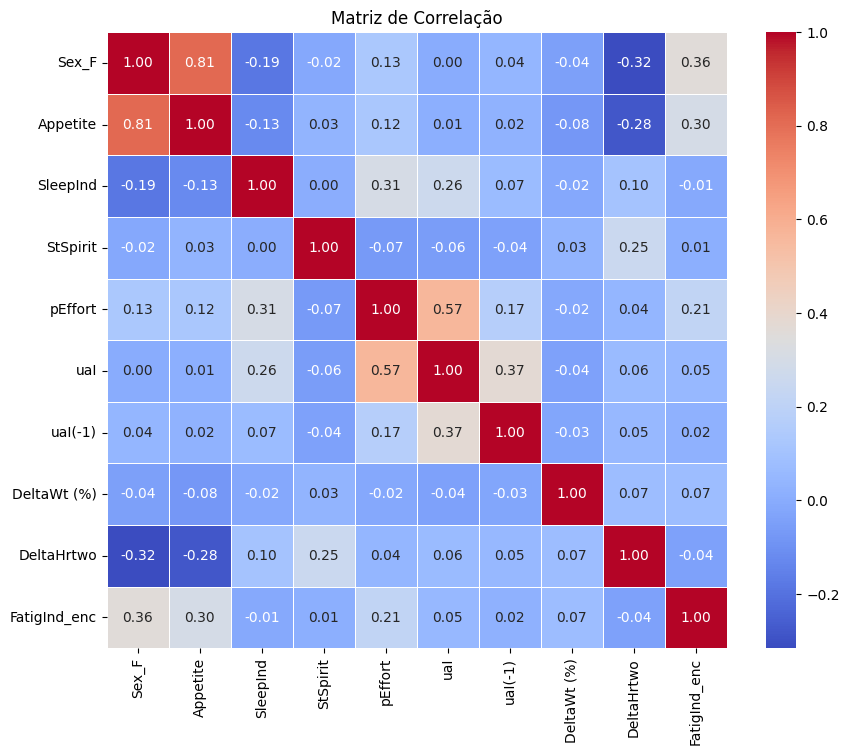

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Exemplo de DataFrame (substitua com seu próprio dataset)
# df = pd.read_csv('seu_arquivo.csv')
df_corr = df_limited.copy()
df_corr = df_corr[['Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
       'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'FatigInd']]
       
# Codificar a variável target (se ela for categórica)
# Suponha que 'target' seja a variável categórica
encoder = LabelEncoder()
df_corr['FatigInd_enc'] = encoder.fit_transform(df_corr['FatigInd'])

# Selecione apenas as variáveis numéricas para calcular a correlação
df_numeric = df_corr.select_dtypes(include=['float64', 'int64'])

# Adicione a variável target codificada para análise de correlação
df_numeric['FatigInd_enc'] = df_corr['FatigInd_enc']

# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()


---
---
---

In [14]:
df_limited.columns

Index(['Name', 'Date', 'Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
       'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'FatigInd'],
      dtype='object')

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

filtered_df = df_limited[df_limited["Sex_F"] > 0.5] # so masculino, >0.5, so feminino


X = filtered_df[['Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort',
       'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo']]
y = filtered_df['FatigInd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Display coefficients of the model (for each feature)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Accuracy: 0.4857142857142857
Confusion Matrix:
[[ 2  1  6  5]
 [ 0  9  1  4]
 [ 0  3 15  7]
 [ 2  1  6  8]]
Classification Report:
              precision    recall  f1-score   support

     Caution       0.50      0.14      0.22        14
 Low/Minimal       0.64      0.64      0.64        14
     Optimal       0.54      0.60      0.57        25
        Risk       0.33      0.47      0.39        17

    accuracy                           0.49        70
   macro avg       0.50      0.46      0.46        70
weighted avg       0.50      0.49      0.47        70

Model Coefficients: [[ 5.24755941e-04 -8.44929426e-01 -2.54237855e-02  9.67834126e-02
   2.24317676e-01  2.69471175e-01 -8.32792167e-02 -3.34846080e-01
  -2.48081113e-01]
 [-1.26067457e-04  2.25566195e-01 -9.71964595e-02 -4.87213329e-02
  -1.09189366e+00  6.89136691e-02 -4.68155928e-02  2.00400127e-01
   1.72643687e-01]
 [-1.78519105e-05  8.23628896e-01  2.13720929e-01 -2.95283455e-01
   8.52668786e-02 -1.99989510e-01  2.77118934e

In [16]:
df.value_counts('Sex_F')

Sex_F
1    806
0    355
Name: count, dtype: int64

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GroupShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Assuming df_limited is your dataframe
# Sorting by date to maintain time order
df_limited = df_limited.sort_values(by=['Athlete', 'Date'])

# Adding a column to indicate the count of days for each athlete
df_limited['DayCount'] = df_limited.groupby('Athlete').cumcount() + 1

# Features and target
X = df_limited.drop(columns=['FatigInd', 'Athlete', 'Date'])  # Dropping target for modeling
y = df_limited['FatigInd']

# Including athlete as a group for splitting by athletes
groups = df_limited['Athlete']

# Splitting by athletes while keeping the time order
gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Creating a pipeline with normalization and SVM (gamma=30)
svm_pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma=30, probability=True))
])

# Fitting the first model
svm_pipeline_1.fit(X_train, y_train)

# Evaluation of the first model (accuracy score)
accuracy_1 = svm_pipeline_1.score(X_test, y_test)
print(f'Accuracy with gamma=30, C=1.0: {accuracy_1:.2%}')

# Getting accuracy per target variable (classification report)
y_pred_1 = svm_pipeline_1.predict(X_test)
report_1 = classification_report(y_test, y_pred_1, target_names=['Risk/Caution', 'Optimal', 'Minimal'])
print(report_1)

# Creating and training a new SVM with C=100 and gamma=30
classifier_100 = SVC(kernel='rbf', gamma=30, C=100)
classifier_100.fit(X_train, y_train)

# Printing the accuracy score for the model with C=100
accuracy_2 = classifier_100.score(X_test, y_test)
print(f'Accuracy with gamma=30, C=100: {accuracy_2:.2%}')

# Plotting the results
accuracies = [accuracy_1, accuracy_2]
labels = ['Gamma=30, C=1.0', 'Gamma=30, C=100']

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('SVM Accuracy with Different Parameters')
plt.show()

# Plotting the confusion matrix for the first model
conf_matrix = confusion_matrix(y_test, y_pred_1, labels=['Risk/Caution', 'Optimal', 'Minimal'])
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Risk/Caution', 'Optimal', 'Minimal'])
disp.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix for SVM Model (Gamma=30, C=1.0)')
plt.show()


KeyError: 'Athlete'

In [31]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Assuming df_limited is already loaded

# Transform 'Date' to a new column 'NDay', where it counts the number of days per athlete
df_limited['Date'] = pd.to_datetime(df_limited['Date'])
df_limited = df_limited.sort_values(by=['Name', 'Date'])
df_limited['NDay'] = df_limited.groupby('Name').cumcount() + 1

# Encode the target variable 'FatigInd'
label_encoder = LabelEncoder()
df_limited['FatigInd'] = label_encoder.fit_transform(df_limited['FatigInd'])

# Define features and target
features = ['Sex_F', 'NDay', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort', 'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo']
X = df_limited[features]
y = df_limited['FatigInd']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVC model
svc_model = svm.SVC(kernel='rbf', C=10.0, gamma= 'scale')
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Risk', 'Caution', 'Optimal', 'Low/Minimal']))

              precision    recall  f1-score   support

        Risk       0.50      0.52      0.51        21
     Caution       0.90      0.76      0.83        25
     Optimal       0.66      0.79      0.72        24
 Low/Minimal       0.61      0.56      0.58        25

    accuracy                           0.66        95
   macro avg       0.67      0.66      0.66        95
weighted avg       0.67      0.66      0.67        95



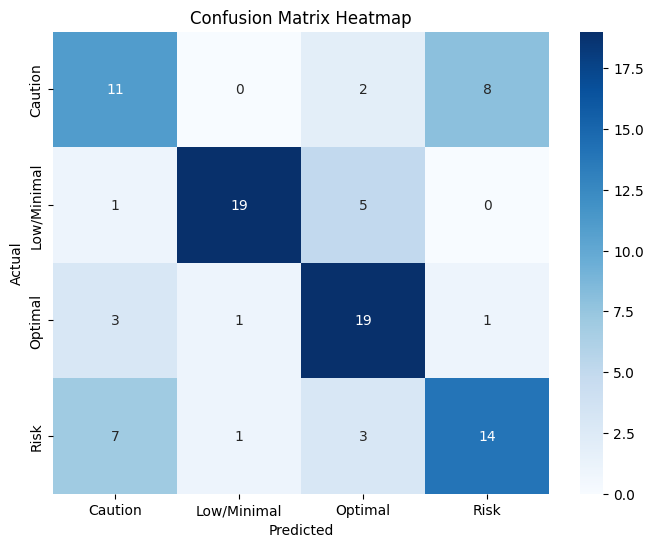

In [19]:
# Print confusion matrix as a heat map
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

              precision    recall  f1-score   support

        Risk       0.12      0.04      0.06        83
     Caution       0.66      0.29      0.41       119
     Optimal       0.19      0.81      0.31        72
 Low/Minimal       0.62      0.04      0.08       116

    accuracy                           0.26       390
   macro avg       0.40      0.29      0.21       390
weighted avg       0.45      0.26      0.22       390



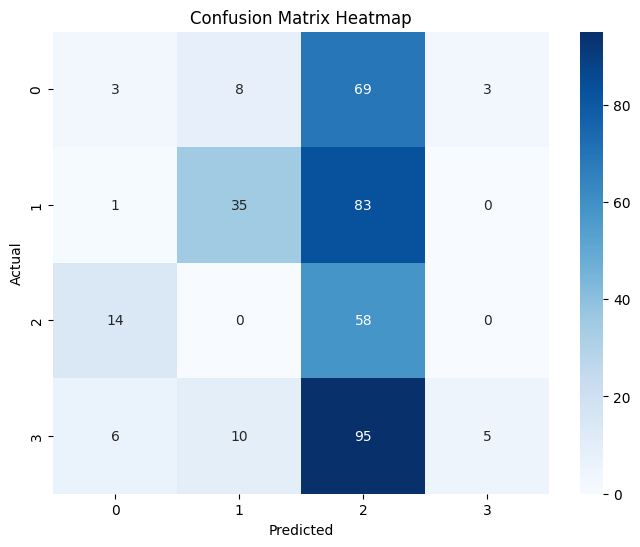

In [25]:
from sklearn import svm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_limited is already loaded

# Transform 'Date' to a new column 'NDay', where it counts the number of days per athlete
df_limited['Date'] = pd.to_datetime(df_limited['Date'])
df_limited = df_limited.sort_values(by=['Name', 'Date'])
df_limited['NDay'] = df_limited.groupby('Name').cumcount() + 1

# Encode the target variable 'FatigInd'
label_encoder = LabelEncoder()
df_limited['FatigInd'] = label_encoder.fit_transform(df_limited['FatigInd'])

# Define features and target
features = ['SleepInd', 'pEffort', 'uaI', 'uaI(-1)']
X = df_limited[features]
y = df_limited['FatigInd']

# Use TimeSeriesSplit to maintain time order in training and testing
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store results
y_true_all = []
y_pred_all = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train SVC model
    svc_model = svm.SVC(kernel='rbf', C=10.0, gamma= 0.01)
    svc_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svc_model.predict(X_test)

    # Store results
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# Print classification report
print(classification_report(y_true_all, y_pred_all, target_names=['Risk', 'Caution', 'Optimal', 'Low/Minimal']))

# Print confusion matrix as a heat map
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


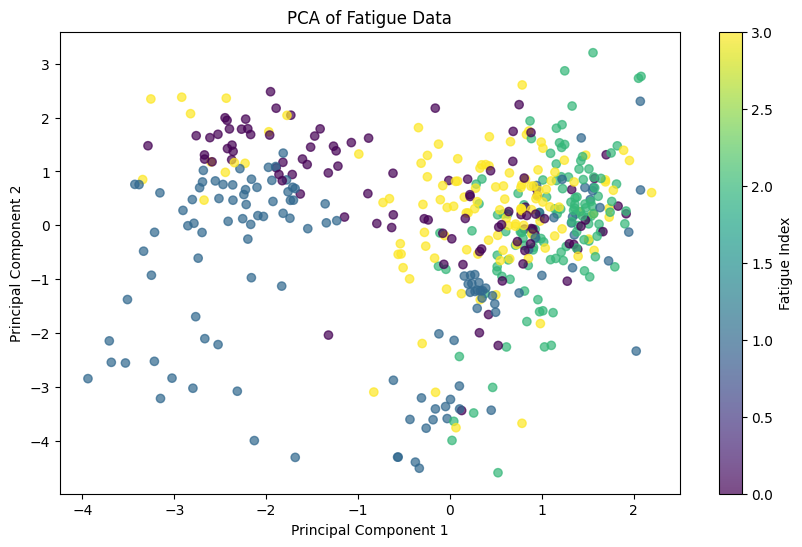

              precision    recall  f1-score   support

        Risk       0.31      0.24      0.27        83
     Caution       1.00      0.13      0.24       119
     Optimal       0.26      1.00      0.41        72
 Low/Minimal       0.60      0.16      0.25       116

    accuracy                           0.32       390
   macro avg       0.54      0.38      0.29       390
weighted avg       0.60      0.32      0.28       390



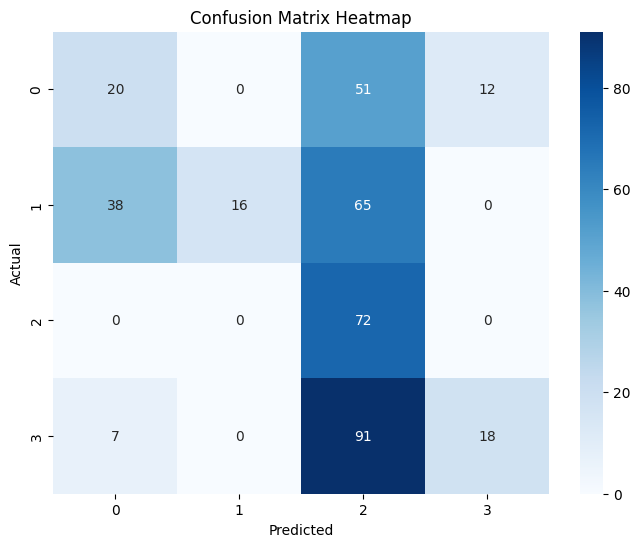

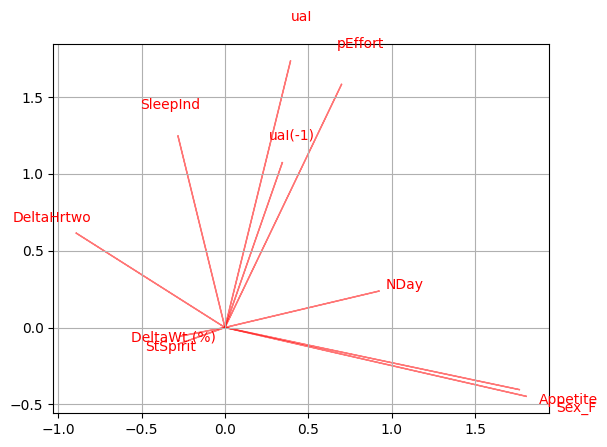

In [24]:
from sklearn import svm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_limited is already loaded

# Transform 'Date' to a new column 'NDay', where it counts the number of days per athlete
df_limited['Date'] = pd.to_datetime(df_limited['Date'])
df_limited = df_limited.sort_values(by=['Name', 'Date'])
df_limited['NDay'] = df_limited.groupby('Name').cumcount() + 1

# Encode the target variable 'FatigInd'
label_encoder = LabelEncoder()
df_limited['FatigInd'] = label_encoder.fit_transform(df_limited['FatigInd'])

# Define features and target
features = ['Sex_F', 'Appetite', 'SleepInd', 'StSpirit', 'pEffort', 'uaI', 'uaI(-1)', 'DeltaWt (%)', 'DeltaHrtwo', 'NDay']
X = df_limited[features]
y = df_limited['FatigInd']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fatigue Data')
plt.colorbar(label='Fatigue Index')
plt.show()

# Use TimeSeriesSplit to maintain time order in training and testing
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store results
y_true_all = []
y_pred_all = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train SVC model
    svc_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
    svc_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svc_model.predict(X_test)

    # Store results
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# Print classification report
print(classification_report(y_true_all, y_pred_all, target_names=['Risk', 'Caution', 'Optimal', 'Low/Minimal']))

# Print confusion matrix as a heat map
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

#Plot the vectors (loadings) along the principal components
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i] * 3, pca.components_[1, i] * 3, color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 3.5, pca.components_[1, i] * 3.5, feature, color='r', ha='center', va='center')

plt.grid()
plt.show()